# Author: Стурейко Игорь
## Project: Geekbrains.Algorithms
## Lesson 01 - Градиентный спуск
## Date: 2020-08-21

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Подберите скорость обучения (alpha) и количество итераций.

In [92]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

### Рассмотрим ошибку в зависимости от количества шагов при фиксированном $\alpha$:

In [93]:
def gd_err_opt(n_steps, alpha, step, eps):
    """
    Проводим расчет до тех пор пока отличия в ошибки на соседнем шаге больше чем eps*err
    eps - заданная точность расчета
    err - ошибка, вычисленная на последнем шаге
    """
    X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
    y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

    n = X.shape[1]
    W = np.array([1, 0.5])
    W, alpha
    n_max = 0

    err = [4000]
    cont = True
    for i in range(1, n_steps):
        if cont:
            y_pred = np.dot(W, X)
            err_i = calc_mse(y, y_pred)
            for ii in range(W.shape[0]):
                W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
            if i % step == 0:
                err.append(err_i)
                if (err[-2] - err[-1]) < eps*err[-1]:
                    cont = False
                    n_max = i
        else:
            if i % step == 0:
                err.append(0)
    err.append(0)
    # массив ошибок, после максимального n заполняется 0
    # максимальное n для которого разность в изменении ошибки на соседних шагах более 1%
    return(err[1:], n_max)

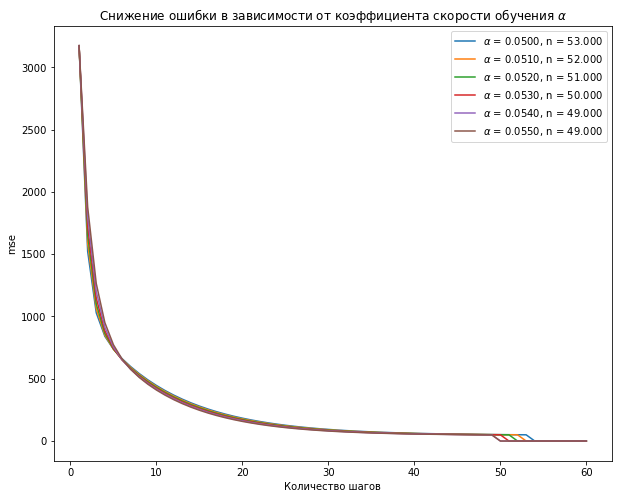

In [94]:
steps = 60 # кол-во шагов
step = 1 # шаг вывода результатов
eps = 0.01 # точность - 1%
alpha = np.arange(5e-2, 5.6e-2, 1e-3) # диапазон изменения коэффициентов обучения
s = np.arange(1, steps+1, step) # диапазон для шагов градиентного спуска
plt.figure(figsize = (10,8))
for a in alpha:
    y_res, n_max =  np.array(gd_err_opt(steps, a, step, eps))
    plt.plot(s, y_res, label=rf'$\alpha$ = {a:0.4f}, n = {n_max:0.3f}')

plt.title(r'Снижение ошибки в зависимости от коэффициента скорости обучения $\alpha$')
plt.xlabel('Количество шагов')
plt.ylabel('mse')
plt.legend()
plt.show()

Пороговое значение количества шагов при котором ошибка меняется менее чем на 1% = 50. Коэффициент скорости обучения $\alpha = 0.05$

## Исправить ошибку

In [112]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

n = X.shape[1]
W = np.array([1, 0.5])
print(f'W = {W}')
alpha = 5e-2
for i in range(50):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
    if i % 1 == 0:
        print(f'i = {i}, W = [{W[0]:0.4f} {W[1]:0.4f}], err = {err:0.4f}')

W = [1.  0.5]
i = 0, W = [6.5100 17.5000], err = 3173.1500
i = 1, W = [7.0490 8.2474], err = 1522.7921
i = 2, W = [9.9398 12.3635], err = 1029.0417
i = 3, W = [11.4713 9.7185], err = 840.6530
i = 4, W = [13.5374 10.5370], err = 737.2446
i = 5, W = [15.1840 9.6233], err = 661.3163
i = 6, W = [16.9036 9.6154], err = 597.4670
i = 7, W = [18.4532 9.1720], err = 541.2167
i = 8, W = [19.9632 8.9731], err = 490.9556
i = 9, W = [21.3738 8.6720], err = 445.8600
i = 10, W = [22.7218 8.4437], err = 405.3510
i = 11, W = [23.9942 8.1982], err = 368.9496
i = 12, W = [25.2033 7.9803], err = 336.2361
i = 13, W = [26.3480 7.7662], err = 306.8359
i = 14, W = [27.4340 7.5671], err = 280.4134
i = 15, W = [28.4632 7.3763], err = 256.6668
i = 16, W = [29.4390 7.1965], err = 235.3251
i = 17, W = [30.3640 7.0255], err = 216.1449
i = 18, W = [31.2410 6.8636], err = 198.9071
i = 19, W = [32.0724 6.7101], err = 183.4151
i = 20, W = [32.8605 6.5646], err = 169.4920
i = 21, W = [33.6077 6.4266], err = 156.9790
i =